# Ablation 2.2: CCDS Sampling Analysis (Multiple Runs)

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid")
RESULTS_DIR = Path('./fruits_new_results')

In [2]:
# Load results from all run files for all scenarios
all_results = []
scenarios = ["ccds", "random", "confident_misclassifications", "uncertain_classifications"]

for scenario in scenarios:
    for result_file in RESULTS_DIR.glob(f'{scenario}_run_*_results.json'):
        run_number = int(result_file.stem.split('_')[2 + scenario.count("_")])  # Extract run number from filename
        with open(result_file, 'r') as f:
            data = json.load(f)
            for item in data:
                item['scenario'] = scenario
                item['run'] = run_number
                all_results.append(item)

if not all_results:
    print("No result files found. Please run the experiment first.")
else:
    df = pd.DataFrame(all_results)


## Worst-Group Accuracy Over Iterations with Error Bars

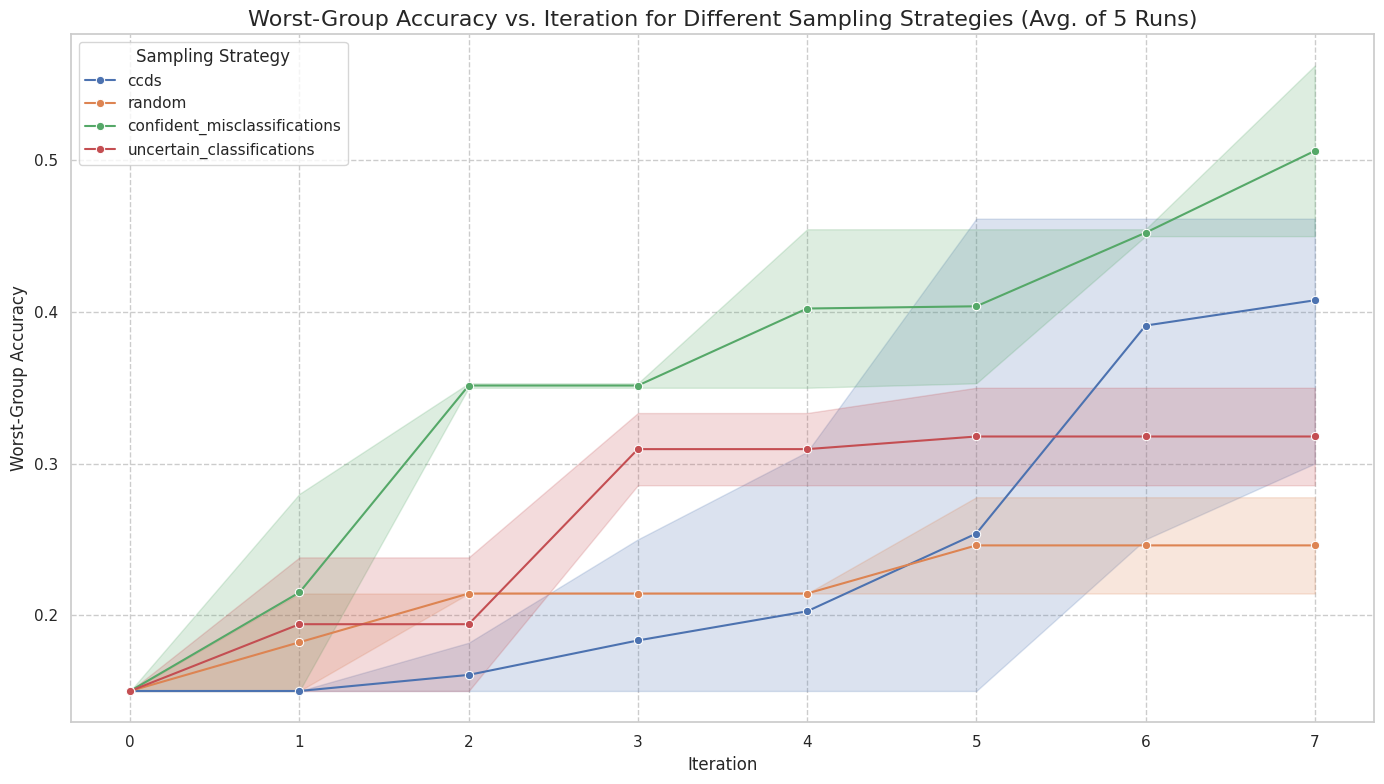

In [3]:
# Plot the results with error bars (confidence intervals)
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df,
    x='iteration',
    y='worst_group_accuracy',
    hue='scenario',
    marker='o',
    errorbar='ci', # Show confidence intervals as error bars
    palette='deep'
)

plt.title('Worst-Group Accuracy vs. Iteration for Different Sampling Strategies (Avg. of 5 Runs)', fontsize=16)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Worst-Group Accuracy', fontsize=12)
plt.grid(True, which='both', linestyle='--')
plt.legend(title='Sampling Strategy')
plt.xticks(df['iteration'].unique())

plt.tight_layout()
plt.show()

### Analysis

The plot now shows the mean performance of each sampling strategy across 5 independent runs. The shaded areas (or error bars) represent the 95% confidence interval.

A strategy is more robust and reliable if it has a consistently high accuracy and a narrow confidence interval. This visualization provides a much stronger basis for comparing the different sampling methods.